In [1]:
from text_utils import RenderFont
from colorize3_poisson import Colorize

import scipy.misc
import numpy as np
import matplotlib.pyplot as plt

In [2]:
text_renderer = RenderFont('data')
colorizer = Colorize('data')

In [3]:
img = scipy.misc.imread('/home/nina/Documents/hockey_tracking/number_recognition/number_recognition/data/players/player6.jpg')
mask = scipy.misc.imread('/home/nina/Documents/hockey_tracking/number_recognition/number_recognition/data/players/mask6.jpg')
mask = (mask[:,:,0] == 0).astype(np.uint8) * 255

y0, y1 = 10, 35
x0, x1 = 0, 30

In [4]:
rgb = img[y0:y1, x0:x1]
collision_mask = np.copy(mask)[y0:y1, x0:x1]
font = text_renderer.font_state.sample()
font = text_renderer.font_state.init_font(font)
render_res = text_renderer.render_sample(font,collision_mask)

min_h = 3
text_mask,loc,bb,text = render_res
im_final = colorizer.color(rgb,[text_mask],np.array([min_h]))
rend_img = img.copy()
rend_img[y0:y1, x0:x1] = im_final

61


text_utils.py:452: RuntimeWarning: divide by zero encountered in true_divide
  r = np.abs(sizes[:,1]/sizes[:,0]) # width/height


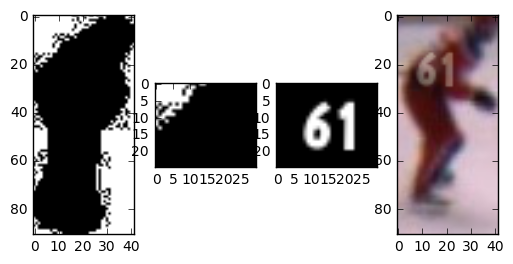

In [5]:
plt.subplot(1, 4, 1), plt.imshow(mask, cmap='gray')
plt.subplot(1, 4, 2), plt.imshow(collision_mask, cmap='gray')
plt.subplot(1, 4, 3), plt.imshow(text_mask, cmap='gray')
plt.subplot(1, 4, 4), plt.imshow(rend_img)
plt.show()